# Blue Coat log analysis notebook
=================================================

## Loading the logs from parquet files in HDFS

The following code loads the access logs from the BlueCoat/accesslog directory in the user's HDFS directory and makes them available as a table.

'data' is a dataframe that contains rows selected by the SQL query.

In [57]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

if __name__ == '__main__':
    sqlContext = SQLContext(sc)

    df = sqlContext.load('BlueCoat/accessLog')
    sqlContext.registerDataFrameAsTable(df, "accesslog")
    #data = sqlContext.sql("SELECT host, count(*) as hits FROM accesslog WHERE action LIKE '%DENIED%' GROUP BY host ORDER BY hits DESC") 
    #data = sqlContext.sql("SELECT * from accesslog where host like 'installerdownloadmy.com'")
    data = sqlContext.sql("SELECT clientip, count(*) as hits from accesslog where action LIKE '%DENIED%' GROUP BY clientip ORDER BY clientip DESC")
    data.show()

clientip    hits
127.0.0.1   3   
10.8.9.19   9   
10.8.9.116  5   
10.8.8.89   4   
10.8.8.81   8   
10.8.8.80   9   
10.8.8.40   2   
10.8.8.162  1   
10.8.8.137  6   
10.8.8.123  69  
10.8.0.13   5   
10.51.40.85 38  
10.51.40.75 31  
10.51.40.72 7   
10.51.40.71 11  
10.51.40.70 765 
10.51.40.68 11  
10.51.40.67 1   
10.51.40.63 23  
10.51.40.62 76  


## Plotting a pie chart from the data
The following code uses the 'matplotlib' to draw a pie chart from 'data'

In [ ]:
%matplotlib inline

hosts = []
hits = []
for i in data.take(5):
    totals.append(i.hits)
    hosts.append(i.host)

plt.pie(hits, labels=hosts)

## Plotting a bar graph from the data
The following code uses the 'matplotlib' to draw a pie chart from 'data'

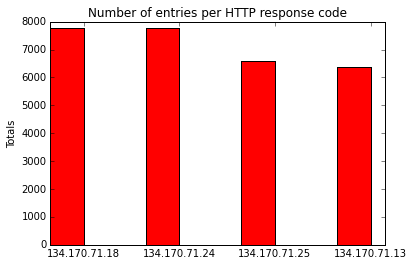

In [39]:
%matplotlib inline

hosts = []
hits = []
for i in data.take(4):
    hits.append(i.hits)
    hosts.append(i.host)
    
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, hits, width, color='r')

# add some
ax.set_ylabel('hits')
ax.set_title('Top 4 denied destinations')
ax.set_xticks(ind+width)
ax.set_xticklabels(hosts)


In [51]:
!ls

bc_analytics.py  buc.log   msr.log	    parser.pyc	   test.py
bc_ingest.py	 hdfs.py   parser_part.pyc  pslist.py	   utils.py
BlueCoat.ipynb	 hdfs.pyc  parser.py	    SImageInfo.py  utils.pyc
